# Eigenvalue problem of a vibrating square membrane

This example illustrates how *RepLAB* could be employed to numerically solve eigenvalue problems, when the operator involved in the problem is subject to symmetries. To be specific, in this document we will show that *RepLAB* can be used as a complement to standard numerical analysis approaches in solving the Laplace's equation, in a way that an iterative method is no longer needed to arrive at an approximate solution.

For this tutorial we assume some prior familiarity with *RepLAB* up to an extent that the user understands how to construct different groups and representations with *RepLAB*; otherwise see [this tutorial](https://replab.github.io/replab/tutorials/S3.html) first. Furthermore, we would suggest that, if the user is not familiar with concepts from *Representation Theory* such as **Schur's lemma** and its applications in **block diagonalization**, to follow this tutorial along with the second chapter of [this textbook](https://www.springer.com/gp/book/9780817635275) or any other similar textbook of personal tase that covers the same topic.   

## Preparation
As always, before using *RepLAB* commands, initialize the library:

In [1]:
run ../../replab_init

Adding RepLAB to the path
Adding RepLAB package to the path
Loading optim package for Octave...
Adding VPI to the path
Adding MOxUnit to the path
Adding embedded YALMIP to the path
Can't locate Texinfo/ModulePath.pm in @INC (you may need to install the Texinfo::ModulePath module) (@INC contains: \mingw64\share\texinfo C:/strawberry-perl-5.30.2.1-64bit-portable/perl/site/lib C:/strawberry-perl-5.30.2.1-64bit-portable/perl/vendor/lib C:/strawberry-perl-5.30.2.1-64bit-portable/perl/lib) at C:\Octave\Octave-5.2.0\mingw64\bin\makeinfo line 82.
BEGIN failed--compilation aborted at C:\Octave\Octave-5.2.0\mingw64\bin\makeinfo line 85.
Can't locate Texinfo/ModulePath.pm in @INC (you may need to install the Texinfo::ModulePath module) (@INC contains: \mingw64\share\texinfo C:/strawberry-perl-5.30.2.1-64bit-portable/perl/site/lib C:/strawberry-perl-5.30.2.1-64bit-portable/perl/vendor/lib C:/strawberry-perl-5.30.2.1-64bit-portable/perl/lib) at C:\Octave\Octave-5.2.0\mingw64\bin\makeinfo line 82.
B

# Introduction

Let a membrane be stretched over a square region and clamped along the boundary. We know, then, that the displacement $u(x,y)$ in the perpendicular plane of the paper satisfies the differential equation $\Delta u +\lambda u = 0$ along with the boundary conditions $u=0$, where $\Delta$ is the Laplacian operator $\Delta = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2}$ and $\sqrt{\lambda}$ is the frequency of the oscillation. 

What we want to accomplish is to numerically solve the above partial differential equation and to this end, we will combine a standard numerical method of solving Laplace's equation, along with a complement numerical study by *RepLAB*. At first, we need to define the lattice points inside the square region and for this we follow the next steps: 

* __Discretization__: Consider a lattice made up of $n = k^2$ points arranged in the square, and number them from the upper left to the bottom right vertex. In our case, the lattice points should look like this: 

In [2]:
LatticePoints = [1 2 3; 4 5 6; 7 8 9]

LatticePoints =

   1   2   3
   4   5   6
   7   8   9



* Approximate $u(x,y)$ by the lattice function $\upsilon$ at the nine points of the square and the negative Laplacian operator $\Delta$ by a cross operator acting on 5 points. The key insight here is that the partial derivatives at the grid point $(i,j)$ can be evaluated using the discrete values of the lattice funtion at $(i,j)$ itself (with weight 4) and those at its 4 neighbouring points (with weight -1). Therefore, the relevant grid points form a "cross" pattern, which we call the "cross operator".  

This defines a discretized 9-dimensional eigenvalue problem: 

\begin{align*} 
M\upsilon = \lambda \upsilon
\end{align*}

where the $i$-th equation is obtained by translating the cross operator into the point no i. Hence, for example, the first and the fifth equations read:

\begin{align*}
4\upsilon_1 - \upsilon_2 - \upsilon_4 = \lambda\upsilon_1 \\
4\upsilon_5 - \upsilon_2 -\upsilon_4 - \upsilon_6 - \upsilon_8 = \lambda\upsilon_5
\end{align*}

where $\upsilon_i$ is the lattice function at the $i$-th lattice point.

By doing so, and by writing explicitly down the rest of the equations we obtain a $n \times n$ matrix for $M$: 

In [3]:
M=[4 -1 0 -1 0 0 0 0 0; -1 4 -1 0 -1 0 0 0 0; 0 -1 4 0 0 -1 0 0 0; 
    -1 0 0 4 -1 0 -1 0 0; 0 -1 0 -1 4 -1 0 -1 0; 0 0 -1 0 -1 4 0 0 -1; 
    0 0 0 -1 0 0 4 -1 0;0 0 0 0 -1 0 -1 4 -1 ; 0 0 0 0 0 -1 0 -1 4] ;

# Symmetrization

Up to this point, we have only made use of the well-known method of *Finite Differences* in constructing an eigenvalue problem for our $\Delta$-operator. In the following, instead of employing an iterative method to find solutions for the lattice function (as is often the case with other numerical studies), we will demonstrate how we can exploit the symmetries of our operator along with *RepLAB* to simplify the eigenvalue problem.    

At first, notice that the discretized cross operator has the symmetry of the Dihedral Group $D_4$, which is the group of the symmetries of the square; that is to say all the rotations and reflections that map the square to itself. Let the two generators of $D_4$ be the two reflections; one about a diagonal connecting the lattice points $3$ and $7$ and one about a vertical line joining the midpoints of two opposite sides (here, we will take the line that joins the points $2$ and $8$). Thereby, we can construct a $9D$ representation of $D_4$ by regarding the 9 objects to be permuted as the lattice points inside the square region, while we transform the square under the action of $D_4$.

## Constructing $D_4$ as a subgroup of $S_9$ 

We can ask *RepLAB* to construct the dihedral group as a subgroup of $S9$. For this to be able to happen, we should provide the generators of the subgroup that we wish to generate and specify the parent representation. In this example, since we are permuting 9 distinct elements, the parent representation is the Symmetric Group $S_9$, and in *RepLAB* this construction can be achieved with the simple command: 

In [4]:
S9 = replab.S(9); 

The generators of the dihedral group can be found be looking at the results of the reflections on the lattice points of the square. Take, for instance, the reflection about the vertical axis defined above. This transformation will map the lattice points of the 2nd column to themselves, while it will interchange the 1st and the 3rd column, leading to a new setting of points. A generator is attributed to this transformation by converting this new setting of lattice points into an array of numbers. As a matter of fact, the new point settings can be realized as the images of the initial lattice under the applied transformations.

We denote by $g_1$,$g_2$ the generators associated with the reflections about the diagonal and the vertical axis respectively:

In [5]:
g1 = [9 6 3 8 5 2 7 4 1]; 
g2 = [3 2 1 6 5 4 9 8 7]; 

At this point, we initiate the *replab.PermutationSubgroup* class as follows: 

In [6]:
DH = replab.PermutationSubgroup(S9, {g1 g2})

DH =

replab.PermutationSubgroup
  domainSize: 9                                
    identity: [1, 2, 3, 4, 5, 6, 7, 8, 9]      
      parent: Permutations acting on 9 elements
generator(1): [9, 6, 3, 8, 5, 2, 7, 4, 1]      
generator(2): [3, 2, 1, 6, 5, 4, 9, 8, 7]      



This way we have created an instance of the dihedral group $D_4$ by associating to every single symmetry of the square a permutation of the 9 lattice points.   

## The complete reducibility of the natural representation of $D_4$

We know proceed further and construct the *natural representation* of the dihedral group with the help of the class *replab.PermutationGroup*: 

In [7]:
natRep = DH.naturalRep; 

and ask *RepLAB* to decompose this representation into its irreducible components: 

In [8]:
natDec = natRep.decomposition.nice;
natDec.nComponents

ans =  4


This shows that the natural representation of the dihedral group has 4 *irreducible* components. To find their dimensions and their multiplicities in *RepLAB* is an easy task; simply use the *.irrepDimension* and *.multiplicity* methods from the *replab.Isotypic* class. 

Below, we demonstrate how this is achieved in *RepLAB* for 4th isotypic component:

In [9]:
Iso4 = natDec.component(4);
Iso4.irrepDimension
Iso4.multiplicity

ans =  2
ans =  2


From that we conclude that the decomposed *natural representation*, when expressed as a direct sum, will have two copies of a 2D irreducible representation, and by a direct application of the Schur's lemma, those two copies must be mutually inequivalent. 

## The isotypic components for $\vartheta_{nat}$

If we let $\vartheta_{nat}$ be the natural representation of the group $D_4$ acting on the lattice points, then we showed by the decomposition method that we can express $\vartheta_{nat}$ as the direct some of more fundamental representations as:  
\begin{align*}
\vartheta_{nat} = c_1 \vartheta_1 \oplus c_2 \vartheta_2 \oplus \dots \oplus c_N \vartheta_N
\end{align*}

where $\vartheta_j$ are irreducible and mutually inequivalent representations of $G$. while we indicate by $c_j$ the multiplicity and by $n_j$ the dimensions of $\vartheta_j$. Consequently, the representation space $V$ of $\vartheta_{nat}$ decomposes into 
\begin{align*}
V = V_1 \oplus V_2 \oplus \dots \oplus V_N
\end{align*}

Here $V_j$ consists of $c_j$ *invariant* subspaces $V^1_j, V^2_j, \dots V^{c_j}_j$, each of which has dimension $n_j$ and transforms under the irreducible representation $\vartheta_j$. We call the $(c_j n_j)$-dimensional subspaces $V_j$ of $V$ the __isotypic components__ of type $\vartheta_j$ for $\vartheta_{nat}$.  

As a result, if we continue in the same manner, we can construct the following table, where we present the isotypic components $V_j$ of the 9-dimensional representation along with the multiplicities $c_j$ and the dimensions $n_j$ of the corresponding irreducible subspaces $V^i_j$

|                             | Multiplicity $c_j$| Dimension $n_j$ |
| --------------------------- |:-----------------:| ---------------:|
| 1st isotypic component      |       3           |         1       |
| 2nd isotypic component      |       1           |         1       |
| 3rd isotypic component      |       1           |         1       |
| 4th isotypic component      |       2           |         2       |

The unique feature of *RepLAB* is that it provides the change of basis matrix that makes the block-diagonal form of the images apparent. In *RepLAB*, this can be realized by asking for the basis of the decompositition: 

In [10]:
basis = natDec.basis;

To make this even more clear, we now ask *RepLAB* for the images of the generators in the natural representation and then we transform them under a similarity transformation induced by the basis matrix:

In [11]:
image1 = natRep.image(g1); image2 = natRep.image(g2);
inv(basis)*image1*basis
inv(basis)*image2*basis

ans =

 Columns 1 through 8:

   1.00000  -0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000
   0.00000   1.00000   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   1.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000  -1.00000   0.00000   0.00000  -0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   1.00000  -0.00000  -0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.98397  -0.17834   0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.17834   0.98397  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000  -0.98397
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   0.00000  -0.17834

 Column 9:

  -0.00000
  -0.00000
   0.00000
  -0.00000
   0.00000
  -0.00000
  -0.00000
  -0.17834
   0.98397

ans =

 Columns 1 through 8:

   1.00000   0.00000   0.00000   0.00000  -0.00000   0.00000  -0.00000  -0.00000
   0.00000   1.00

As expected, this verifies that the images have a block diagonal structure. In what follows, we are considering as our basis the vectors of the column space of the basis matrix, which *RepLAB* returns after the decomposition. This choice of basis vectors is ideal for the purposes of the block symmetrization, since it manifests the block-diagonal nature of the images. 

## The Block Diagonalization of the matrix $M$

Before we go on and apply symmetrization to the matrix $M$, we have to be sure that our matrix has the symmetry of the representation $\vartheta_{nat}$. In other words, the relation 
\begin{align*}
MD(s) = D(s)M
\end{align*}
should be satisfied for every element $s$ in the dihedral group $D_4$, where $D(s)$ are the representing matrices in the natural representation. Since every other element of $D_4$ can be written as a composite of the generators, we only have to check if the above condition is met for the images of the generators $g_1$ and $g_2$. 

In [12]:
assert(isequal(M*image1,image1*M))
assert(isequal(M*image2,image2*M))

Thus, because the matrix $M$ commutes with the images of the generators in $\vartheta_{nat}$, the first condition for the block diagonalization is met.    

Since we now have the knowledge of that, we can always pass to the coordinate system of that basis and find the form of the matrix $M$ with respect to the aforementioned column vectors. We further assume that the column vectors are a **symmetry adapted basis**, in a sense that the basis vectors of each isotypic component are transformed in exactly the same way under the representation. Taking into account the above table of the isotypic components and based on the existence of invariant subspaces of the representation, we deduce that the new $M$ matrix will contain $n_j$ square blocks of length $c_j$. 

To see how this can be accomplished, we apply a similarity transformation to the matrix $M$ in the following manner: 

In [13]:
M_block = inv(basis)*M*basis

M_block =

 Columns 1 through 8:

   4.00000  -0.00000  -4.00000   0.00000  -0.00000  -0.00000   0.00000  -0.00000
   0.00000   4.00000  -2.00000  -0.00000   0.00000  -0.00000   0.00000   0.00000
  -1.00000  -2.00000   4.00000  -0.00000   0.00000   0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   4.00000   0.00000  -0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   4.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   5.39562  -0.00000  -0.22859
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000   5.39562  -0.00000
   0.00000   0.00000  -0.00000  -0.00000   0.00000  -0.22859  -0.00000   2.60438
   0.00000   0.00000   0.00000   0.00000   0.00000   0.00000  -0.22859  -0.00000

 Column 9:

   0.00000
  -0.00000
   0.00000
   0.00000
   0.00000
   0.00000
  -0.22859
  -0.00000
   2.60438



Notice that in the new basis the matrix M acquires indeed a block-diagonal form, a fact that encodes the importance of the process of symmetrization for the eigenvalue problem. However, the careful reader may have noticed that for the last isotypic component we have one $4 \times 4$ block instead of the two $2 \times 2$ blocks that we expected. This contradiction stems from the fact that the column vectors for the 4th isotypic component are not a symmetry adapted basis in the way that we labelled our basis vectors. To further elucidate this point, note that the 6th and 8th column of the above matrix has only two non-zero entries; the same is also true for the 7th and 9th columns. Those entries are the coefficients that you will get, provided that you expand each of the columns of ``M_block`` in terms of the column vectors of our chosen basis. Therefore, it is obvious that the only non-zero coefficients for the 6th and 8th columns of ``M_block`` come from the 6th and 8th column vectors and similarly the 7th and 9th columns are a linear combination of only the 7th and 9th basis vectors.  

Accordingly, we can __rearrange__ the sequence of the __same basis vectors__, in order to make the invariance of the two 2-dimensional subspaces contained in that isotypic component evident. For this reason, we define a new basis from the one that *RepLAB* provides by interchanging the 7th and 8th column:     


In [14]:
basis_new = [basis(:,1:6) basis(:,8) basis(:,7) basis(:,9)];

Relative to the rearranged sequence of the same basis vectors, $M$ has the structure: 

In [15]:
M_block_new = inv(basis_new)*M*basis_new

M_block_new =

 Columns 1 through 8:

   4.00000   0.00000  -4.00000   0.00000   0.00000  -0.00000  -0.00000   0.00000
   0.00000   4.00000  -2.00000   0.00000   0.00000  -0.00000   0.00000   0.00000
  -1.00000  -2.00000   4.00000  -0.00000   0.00000   0.00000  -0.00000   0.00000
  -0.00000  -0.00000   0.00000   4.00000   0.00000  -0.00000   0.00000   0.00000
   0.00000   0.00000   0.00000   0.00000   4.00000   0.00000  -0.00000  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000   5.39562  -0.22859   0.00000
   0.00000  -0.00000   0.00000  -0.00000  -0.00000  -0.22859   2.60438  -0.00000
   0.00000   0.00000   0.00000   0.00000   0.00000  -0.00000  -0.00000   5.39562
   0.00000  -0.00000  -0.00000   0.00000  -0.00000   0.00000  -0.00000  -0.22859

 Column 9:

   0.00000
  -0.00000
   0.00000
  -0.00000
   0.00000
   0.00000
   0.00000
  -0.22859
   2.60438



As a result, having explicitly made use of the symmetries of our problem, we have reduced the eigenvalue problem of M to the $c_j$-dimensional eigenvalue problems: 

\begin{align*}
|M_j - \lambda \mathbb{I}_{c_j}| = 0 \quad j=1,2,\dots, N
\end{align*}

where $M_j$ are the blocks of length $c_j$ that constitute the matrix $M$ and indicate the invariant nature of the subspaces. 

In other words, instead of solving the full eigenvalue problem for the sparse matrix $M$, we only have to take into account the $N$ blocks and solve a $c_j$-dimensional eigenvalue in each block. In this case, it can be checked that the characteristic polynomial of $M$ factors into a cubic and a quadratic equation. 

## Finding the eigenvalues and the eigenspaces 

We are now ready to solve the eigenvalue problem for the block-diagonal matrix M and compute the eigenspaces that correspond to the eigenvalues $\lambda$. In order to be clear which eigenstate corresponds to which eigenvalue, we sort the eigenvalues returned from the *MATLAB/Octave* **eig** function from the lowest to the highest and then we rearrange the columns in this order. This way, it is apparent that the first eigenvalue is the upper left diagonal element of the $E_{new}$ matrix, whereas the associated eigenvector is the first column of the $V_{new}$ matrix, as exemplified below: 

In [20]:
[V,E] = eig(M_block); % Solve the eigenvalue problem
E_new = diag(sort(diag(E), 'ascend')) % make diagonal matrix out of sorted diagonal values of input E
[c,ind]=sort(diag(E),'ascend'); % store the indices of which columns the sorted eigenvalues come from
V_new = V(:,ind) % arrange the columns in this order

E_new =

Diagonal Matrix

 Columns 1 through 8:

   1.1716        0        0        0        0        0        0        0
        0   2.5858        0        0        0        0        0        0
        0        0   2.5858        0        0        0        0        0
        0        0        0   4.0000        0        0        0        0
        0        0        0        0   4.0000        0        0        0
        0        0        0        0        0   4.0000        0        0
        0        0        0        0        0        0   5.4142        0
        0        0        0        0        0        0        0   5.4142
        0        0        0        0        0        0        0        0

 Column 9:

        0
        0
        0
        0
        0
        0
        0
        0
   6.8284

V_new =

 Columns 1 through 8:

  -0.75593   0.00000  -0.00000  -0.02146  -0.13713   0.89443   0.00000  -0.00000
  -0.37796  -0.00000  -0.00000   0.01073   0.06857  -0.44721  -0.00000   0.00

What we get is a diagonal matrix $E_{new}$ that contains all the eigenvalues for the membrane's oscillation frequency, as well as a matrix $V_{new}$ that is constituted by the corresponding eigenvectors. Recall that the block diagonal matrix had already been expressed in terms of the basis thats manifests the invariance of the subspaces, before we evaluated its eigenvalues. Therefore, we can directly extract from the matrix $V_{new}$ the basis of the the eigenspaces $E_{\lambda}$ as a linear combination of the column vectors. 

 ### Extracting the ground oscillation state
For example, we can compute the basis for the 1D-eigenspace that corresponds to the __ground state__, that is the eigenstate with the lowest eigenvalue. According to the diagonal matrix $E_{new}$, the lowest eigenvalue is $\lambda_{GS} = 1.1716$ and the respective eigenvector can be read from the corresponding column of the matrix $V_{new}$. Moreover, if we let $x_1, x_2$ and $x_3$ be the symmetry adapted basis of the first isotypic component, then the basis vector of the eigenspace $E_{GS}$ will be given as a linear combination of the form $ax_1 + bx_2 + cx_3$, where the coefficients $a,b,c$ correspond to the non-zero elements of the first column of $V_{new}$.        

Following the above, we can extract the ground state as demonstrated below: 

In [17]:
x1 = basis(:,1); x2 = basis(:,2); x3 = basis(:,3); % Define the basis vectors in the first isotypic component
gs = V_new(1,1)*x1 + V_new(2,1)*x2 + V_new(3,1)*x3; % Extract the coefficients for the linear combination
GS_matrix = reshape(gs, [3 3])' % convert the column vector into a "lattice function"

GS_matrix =

  -0.37796  -0.53452  -0.37796
  -0.53452  -0.75593  -0.53452
  -0.37796  -0.53452  -0.37796



This lattice function is the approximation to the ground oscillation of the membrane, since the numbers assigned to the nine points describe the displacements of the membrane at the corresponding positions. 

### Extracting the highest oscillation state
In a completely analogous manner the lattice function for the oscillation with the highest eigenvalue can also be found. Since we have already sorted out the eigenvalues, we know that the eigenvector for this eigenspace is encoded in the last column of the matrix $V_{new}$, and it turns out that we can write the basis vector for this eigenstate as a linear combination of the basis of the first isotypic component: 

In [18]:
hs = V_new(1,9)*x1 + V_new(2,9)*x2 + V_new(3,9)*x3;
HS_matrix = reshape(hs,[3 3])'

HS_matrix =

   0.37796  -0.53452   0.37796
  -0.53452   0.75593  -0.53452
   0.37796  -0.53452   0.37796



Proceeding in a similar manner, we can get the basis for each of the eigenspaces $E_{\lambda}$ and express it with respect to the reordered basis vectors in the isotypic components of the natural representation. Remember that the coefficients for the linear expansion can in principle be always read off from the columns of the matrix ``V_new``. 

## Plotting the lattice functions for extreme cases

As we now have the lattice functions for the ground and the highest oscillations, it is possible to construct some plots to further illustrate how the membrane is oscillating in these two extreme cases.  

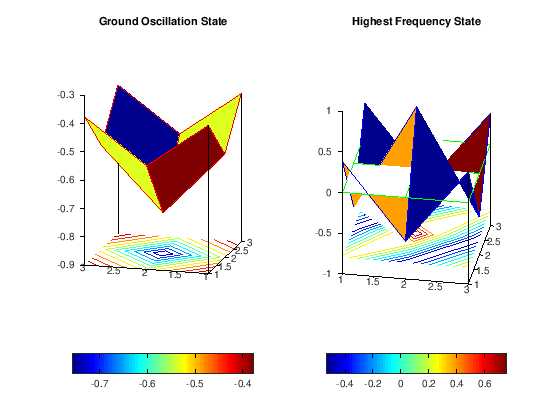

In [21]:
[s,t] = meshgrid(1:3);
figure;
subplot(1,2,1)
surfc(GS_matrix,'EdgeColor','red')
title('Ground Oscillation State')
view(285,11)
grid off;
colorbar ("southoutside");
subplot(1,2,2)
surfc(HS_matrix,'EdgeColor','blue')
colormap('jet')
title('Highest Frequency State')
grid off; 
colorbar ("southoutside");
view(285,11)
hold on
plane=0*s; 
mesh(s,t,plane,'EdgeColor', 'green')
hold off
view(10,20)

The important thing to notice here is that in the **ground oscillation** the displacements of each of the lattice points have the same sign, thus recovering the result from the *theory of continuous oscillators* that the ground oscillation never vanishes in the interior of the membrane. On the other hand, as fas as the **oscillation with the highest frequency** is concerned, the displacements have a maximal number of sign changes. To clarify this, we have included in the plot the plane $z=0$, so that we can verify that between two positive displacements there is a negative one (this can be seen from the lattice function ``HS_matrix`` as well), leading to a maximum number of node lines in the membrane region.

# Summary
_________

In this tutorial, we have illustrated how group theoretical methods can be implemented in an eigenvalue problem when the operator in question is subject to symmetries and we indicated a way that *RepLAB* can act as a complement to numerically solve a toy model, namely the eigenvalue problem of an oscillating square membrane. In particular, we emphasized that we can arrive at the **block diagonalization** of the matrix $M$ with ease, provided that we make use of a unique feature of *RepLAB*: the change of basis matrix that it provides, every time we ask *RepLAB* to decompose a representation into its irreducible components. 

Before we close, even though we discretized the square region using only $n=9$ lattice points, thus asking for a subgroup of the dihedral group $D_4$ in the parent representation $S_9$, a generalization of the method presented in this document is straighforward in arbitrary number of points. For instance, we could have employed a lattice with even more points and asking for a representation of $D_4$ in the symmetric group $S_n$. However, for the purposes of the current tutorial, we decided to use only 9 lattice points and focus on making clear how a block-diagonal structure for the matrix $M$ can be accomplished numerically in *RepLAB*.    